## Import libraries

In [1]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap

## Connect to _source_ and _target_ GIS organizations

In [2]:
source = GIS(profile="clone-starter", verify_cert=False)
target = GIS(profile="cloning_admin", verify_cert=False)

In [6]:
import arcgis.gis.server

## Search for `ArcGIS Dashboard` items

<Item title:"Deforestation in Belize" type:Dashboard owner:clonerator>
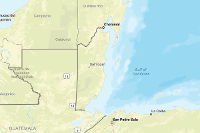

In [3]:
dash_item = source.content.search(query="*", item_type="Dashboard")[0]
dash_item

## Get the `Dashboard` data

* use the [`get_data()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.get_data) function to return the data represented by the `item`

### Determine the various `keys` available for searching the `Dashboard`

In [4]:
list(dash_item.get_data().keys())

['version',
 'widgets',
 'settings',
 'mapOverrides',
 'theme',
 'themeOverrides',
 'numberPrefixOverrides',
 'layout']

### Determine the various `widget` types used in this `Dashboard`

In [5]:
for widget in dash_item.get_data()['widgets']:
    print(widget['type'])

mapWidget
pieChartWidget
gaugeWidget
listWidget


### Get the `Webmap(s)` information used in this `Dashboard`

In [6]:
dash_map = [w for w in dash_item.get_data()['widgets']
            if w['type'] == 'mapWidget'][0]
dash_map

{'type': 'mapWidget',
 'flashRepeats': 3,
 'itemId': '833ec88a0b7b4efea1de858c98519b18',
 'mapTools': [{'type': 'legendTool'},
  {'type': 'mapContentsTool'},
  {'type': 'bookmarksTool'}],
 'showNavigation': True,
 'showPopup': True,
 'scalebarStyle': 'ruler',
 'layers': [{'type': 'featureLayerDataSource',
   'layerId': 'Belize_Ecology_211'},
  {'events': [{'type': 'selectionChanged',
     'actions': [{'type': 'flashGeometry',
       'targetId': 'b8d1195b-9ef8-4a16-9ec7-21127cce2aa7'}]}],
   'type': 'featureLayerDataSource',
   'layerId': 'Belize_Ecology_9479'}],
 'id': 'b8d1195b-9ef8-4a16-9ec7-21127cce2aa7',
 'name': 'Watersheds and Biodiversity Areas in Belize',
 'showLastUpdate': True,
 'noDataVerticalAlignment': 'middle',
 'showCaptionWhenNoData': True,
 'showDescriptionWhenNoData': True}

### Get the `Webmap item` from the _source_

<Item title:"Watersheds and Biodiversity in Belize" type:Web Map owner:clonerator>
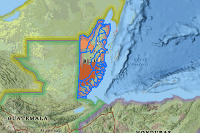

In [7]:
dash_wm = source.content.get(dash_map['itemId'])
dash_wm

### Create a list of all the current `Webmaps` in the _target_

In [8]:
my_target_wms = target.content.search(query="*", 
                                      item_type="Web Map", 
                                      max_items=500)
target_wms = target.content.search(query="NOT owner:" + target.users.me.username +
                                         "NOT owner:esri*",
                                   item_type="Web Map",
                                   max_items=500)
ent_wms = my_target_wms + target_wms
ent_wms

[<Item title:"asdf" type:Web Map owner:DavidJVitale>,
 <Item title:"asdf" type:Web Map owner:DavidJVitale>,
 <Item title:"USA time zones and capitols" type:Web Map owner:arcgis_python>,
 <Item title:"Location Allocation example of Pizza Stores in San Francisco" type:Web Map owner:arcgis_python>,
 <Item title:"USA time zones and capitols" type:Web Map owner:arcgis_python>,
 <Item title:"NoImageryLayer-2020-02-08 07:55:09.538557" type:Web Map owner:arcgis_python>,
 <Item title:"NoImageryLayer-2020-02-09 01:19:28.191440" type:Web Map owner:arcgis_python>,
 <Item title:"NoImageryLayer-2020-02-18 22:19:14.392767" type:Web Map owner:arcgis_python>,
 <Item title:"NoImageryLayer-2019-12-11 23:38:56.927915" type:Web Map owner:arcgis_python>,
 <Item title:"NoImageryLayer-2019-11-26 10:29:00.724633" type:Web Map owner:arcgis_python>,
 <Item title:"NoImageryLayer-2019-12-14 01:31:46.386627" type:Web Map owner:arcgis_python>,
 <Item title:"NoImageryLayer-2019-12-22 15:55:30.155189" type:Web Map own

### Search the _target_ for whether this `Webmap` has already been cloned

In [9]:
for wm in ent_wms:
    type_kws = wm.typeKeywords
    for kw in type_kws:
        if dash_wm.id in kw:
            print(f"{wm.title} has already been cloned from {dash_wm.title} webmap")
            break
    break

## Clone the `Webmap` used in the `Dashboard`

 * Since the `Webmap` consumed in the `Dashboard` does not exist in the target, we'll clone it
 * Using the default `search_existing_items-True`, we know any layers in the `Webmap` that had previously been cloned will reference the cloned layer `item` in the _target_, and any layers not existing in the _target_ will be created

In [10]:
cloned_dash_wm = target.content.clone_items(items=[dash_wm],
                                            folder="Ecological_Information")
cloned_dash_wm

[<Item title:"Belize Ecology" type:Feature Layer Collection owner:clonerator>,
 <Item title:"Watersheds and Biodiversity in Belize" type:Web Map owner:clonerator>]

### Quick preview of the resulting `Webmap` item

<Item title:"Watersheds and Biodiversity in Belize" type:Web Map owner:clonerator>
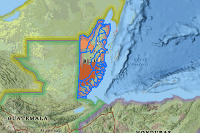

In [11]:
cloned_dash_wm[1]

In [12]:
cloned_dash_wm[1].id

'a5d9cb495f574db3b309c26e05d48ef7'

## Clone the _source_ `Dashboard`

 * the `item_mapping` parameter instructs the resulting cloned `dashboard` to use the _cloned_ `Webmap`

### `item_mapping`

### create a Python dictionary object to use for the parameter argument:
    * `key`: `Webmap.id` of the _source_ `Webmap` consumed in the _source_ `Dashboard`
    * `value`: `Webmap.id` of the _target_ `Webmap` created in the previous `clone_items()` operation

In [13]:
wm_mapping = {dash_wm.id:cloned_dash_wm[1].id}
wm_mapping

{'833ec88a0b7b4efea1de858c98519b18': 'a5d9cb495f574db3b309c26e05d48ef7'}

In [14]:
cloned_dash_item = target.content.clone_items(items=[dash_item],
                                              folder="Ecological_Information",
                                              item_mapping=wm_mapping)
cloned_dash_item

[<Item title:"Deforestation in Belize" type:Dashboard owner:clonerator>]

### Get the resulting `Dashboard`

<Item title:"Deforestation in Belize" type:Dashboard owner:clonerator>
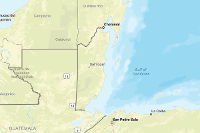

In [15]:
cloned_dash_item[0]

### Inspect the cloned `Dashboard` `widgets` property

In [16]:
cloned_dash_item[0].get_data()['widgets']

[{'type': 'mapWidget',
  'flashRepeats': 3,
  'itemId': 'a5d9cb495f574db3b309c26e05d48ef7',
  'mapTools': [{'type': 'legendTool'},
   {'type': 'mapContentsTool'},
   {'type': 'bookmarksTool'}],
  'showNavigation': True,
  'showPopup': True,
  'scalebarStyle': 'ruler',
  'layers': [{'type': 'featureLayerDataSource',
    'layerId': 'Belize_Ecology_211'},
   {'events': [{'type': 'selectionChanged',
      'actions': [{'type': 'flashGeometry',
        'targetId': 'b8d1195b-9ef8-4a16-9ec7-21127cce2aa7'}]}],
    'type': 'featureLayerDataSource',
    'layerId': 'Belize_Ecology_9479'}],
  'id': 'b8d1195b-9ef8-4a16-9ec7-21127cce2aa7',
  'name': 'Watersheds and Biodiversity Areas in Belize',
  'showLastUpdate': True,
  'noDataVerticalAlignment': 'middle',
  'showCaptionWhenNoData': True,
  'showDescriptionWhenNoData': True},
 {'type': 'pieChartWidget',
  'category': {'sliceProperties': [{'key': 'Sarstoon Temash',
     'label': 'Sarstoon Temash',
     'color': '#ded93e'},
    {'key': 'Crooked Tree

### Get the resulting _target_ `Webmap` to verify

<Item title:"Watersheds and Biodiversity in Belize" type:Web Map owner:clonerator>
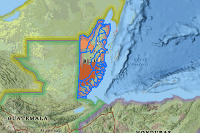

In [17]:
target.content.get(cloned_dash_item[0].get_data()['widgets'][0]['itemId'])